# Software Engineering for Analytics Professionals - Lesson 1

The aim of this course is to teach Software Engineering for Industry to MSBA Students in 2019-2020. This first lesson is an introduction to python & pandas, while using retail data and questions.

## Import libraries

In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd
import scipy.cluster.hierarchy as hac
import scipy.spatial.distance as scipydist

## Constants and connections

In [2]:
font_size = 18

output_dr = 'output_MSBA_2019_2020'
    
if not os.path.exists(output_dr):
    os.mkdir(output_dr)

## Pre-class exercise

The dataset contains daily dollar sales and profit for four product categories at a retail chain in 2017. Margin is defined as profit divided by sales. Normalized margin is defined as daily profit divided by average daily sale. We normalize profit over a year to avoid seasonal differences within a product category.

What is the normalized margin for Category X on Halloween (Oct 31)? Your answer needs to be accurate to two decimal places.

In [3]:
# Loads the dataset
sales_df = pd.read_csv(os.path.join(output_dr,'retail_sales_2017.csv'))

In [4]:
sales_df.head()

,DATE,CATEGORY,PROFIT,SALES
0,2017-01-01,A,415,1099
1,2017-01-01,B,313,916
2,2017-01-01,C,320,1062
3,2017-01-01,D,675,1725
4,2017-01-02,A,37834,103605


In [5]:
# Computes avg daily sales per category
avg_category_sales = sales_df[['CATEGORY', 'SALES']].groupby('CATEGORY', as_index=False).mean()

In [6]:
avg_category_sales

,CATEGORY,SALES
0,A,84487.302198
1,B,71939.708791
2,C,68585.978022
3,D,107390.123626


In [7]:
# Renames sales column
avg_category_sales.rename(columns={'SALES': 'AVG_SALES'}, inplace=True)

In [8]:
avg_category_sales.head()

,CATEGORY,AVG_SALES
0,A,84487.302198
1,B,71939.708791
2,C,68585.978022
3,D,107390.123626


In [9]:
# Merges the daily sales dataframe with average daily sales  
sales_df = pd.merge(sales_df, avg_category_sales, on='CATEGORY')

In [10]:
sales_df.head()

,DATE,CATEGORY,PROFIT,SALES,AVG_SALES
0,2017-01-01,A,415,1099,84487.302198
1,2017-01-02,A,37834,103605,84487.302198
2,2017-01-03,A,34067,93784,84487.302198
3,2017-01-04,A,26478,72773,84487.302198
4,2017-01-05,A,36847,105566,84487.302198


In [11]:
# Computes normalized margine
sales_df['MARGIN'] = sales_df['PROFIT'].div(sales_df['AVG_SALES'])

In [12]:
sales_df.head()

,DATE,CATEGORY,PROFIT,SALES,AVG_SALES,MARGIN
0,2017-01-01,A,415,1099,84487.302198,0.004912
1,2017-01-02,A,37834,103605,84487.302198,0.447807
2,2017-01-03,A,34067,93784,84487.302198,0.403220
3,2017-01-04,A,26478,72773,84487.302198,0.313396
4,2017-01-05,A,36847,105566,84487.302198,0.436125


In [13]:
# The quiz answer
sales_df[sales_df['DATE'] == '2017-10-31']

,DATE,CATEGORY,PROFIT,SALES,AVG_SALES,MARGIN
303,2017-10-31,A,27251,73532,84487.302198,0.322546
667,2017-10-31,B,20505,52359,71939.708791,0.285030
1031,2017-10-31,C,19237,59273,68585.978022,0.280480
1395,2017-10-31,D,33902,79632,107390.123626,0.315690


## Cyclical demand 

Exploring which day of week has highest margin.

In [14]:
# Focuses on one category
margin_one_category = sales_df.loc[sales_df['CATEGORY']=='A', ['DATE', 'MARGIN']].copy()

In [15]:
margin_one_category.head()

,DATE,MARGIN
0,2017-01-01,0.004912
1,2017-01-02,0.447807
2,2017-01-03,0.403220
3,2017-01-04,0.313396
4,2017-01-05,0.436125


In [16]:
# Converts to datetime type
margin_one_category.loc[:, 'DATE'] = pd.to_datetime(margin_one_category['DATE'])

In [17]:
# Finds the corresponding day of week
margin_one_category['DAY_OF_WEEK'] = margin_one_category['DATE'].dt.weekday_name

In [18]:
margin_one_category.head()

,DATE,MARGIN,DAY_OF_WEEK
0,2017-01-01,0.004912,Sunday
1,2017-01-02,0.447807,Monday
2,2017-01-03,0.403220,Tuesday
3,2017-01-04,0.313396,Wednesday
4,2017-01-05,0.436125,Thursday


In [19]:
avg_margin_day_of_week = margin_one_category[['DAY_OF_WEEK', 'MARGIN']].groupby('DAY_OF_WEEK').mean()

In [27]:
avg_margin_day_of_week

,MARGIN
DAY_OF_WEEK,
Friday,0.428681
Monday,0.298460
Saturday,0.486413
Sunday,0.351334
Thursday,0.382773
Tuesday,0.318045
Wednesday,0.310113


In [20]:
avg_margin_day_of_week = avg_margin_day_of_week.reindex(\
                        [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [21]:
avg_margin_day_of_week

,MARGIN
DAY_OF_WEEK,
Monday,0.298460
Tuesday,0.318045
Wednesday,0.310113
Thursday,0.382773
Friday,0.428681
Saturday,0.486413
Sunday,0.351334


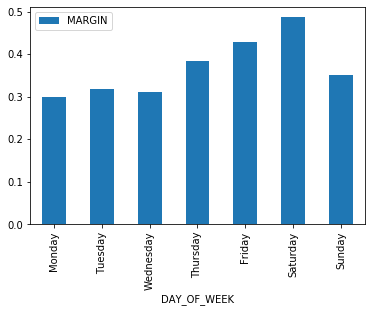

In [22]:
avg_margin_day_of_week.plot(kind='bar');

## Hierarchical clustering

### Compute Pairwise distance

In [23]:
# Pivot dataframes to represent time series
sales_pivot_euclid = sales_df.pivot(index='CATEGORY', columns='DATE', values='MARGIN')
sales_pivot_euclid.head()

DATE,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,...,2017-12-21,2017-12-22,2017-12-23,2017-12-24,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31
CATEGORY,,,,,,,,,,,,,,,,,,,,,
A,0.004912,0.447807,0.403220,0.313396,0.436125,0.439983,0.558060,0.275012,0.320853,0.314568,...,0.557966,0.724180,0.715966,0.391597,0.068200,0.300933,0.414737,0.519510,0.543478,0.409801
B,0.004351,0.509857,0.468754,0.385990,0.354477,0.378956,0.526566,0.319587,0.326482,0.298820,...,0.495192,0.603283,0.543413,0.241619,0.054657,0.259064,0.294566,0.370296,0.385281,0.287949
C,0.004666,0.379042,0.333581,0.300645,0.347039,0.387062,0.552445,0.318345,0.310253,0.277943,...,0.626061,0.781413,0.766017,0.397122,0.095646,0.340172,0.390546,0.489707,0.545709,0.433675
D,0.006285,0.541297,0.463497,0.330021,0.417888,0.450414,0.601350,0.356504,0.339361,0.304032,...,0.524424,0.663581,0.658580,0.337703,0.096517,0.357565,0.451960,0.569261,0.630645,0.474308


In [24]:
# Computes euclidean pairwise distances between observations in n-dimensional space
pdist_euclid = scipydist.pdist(sales_pivot_euclid, metric='euclidean') 
pdist_euclid

array([1.50714476, 1.54642918, 1.07760538, 1.46454713, 1.6409195 ,
       1.9760092 ])

In [25]:
# Shows in square (matrix) form
pdist_euclid_squareform = scipydist.squareform(pdist_euclid)
pdist_euclid_squareform

array([[0.        , 1.50714476, 1.54642918, 1.07760538],
       [1.50714476, 0.        , 1.46454713, 1.6409195 ],
       [1.54642918, 1.46454713, 0.        , 1.9760092 ],
       [1.07760538, 1.6409195 , 1.9760092 , 0.        ]])

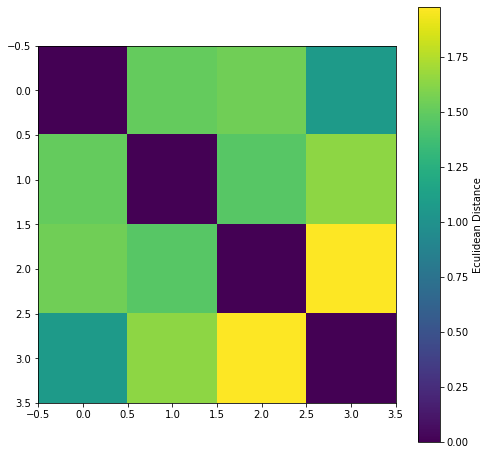

In [26]:
plt.figure(figsize=(8,8))
plt.imshow(pdist_euclid_squareform)
cbar = plt.colorbar()
cbar.set_label('Eculidean Distance')

### Clustering

In [27]:
# Performs hierarchical/agglomerative clustering
clusters_hac = hac.linkage(pdist_euclid, method='complete')

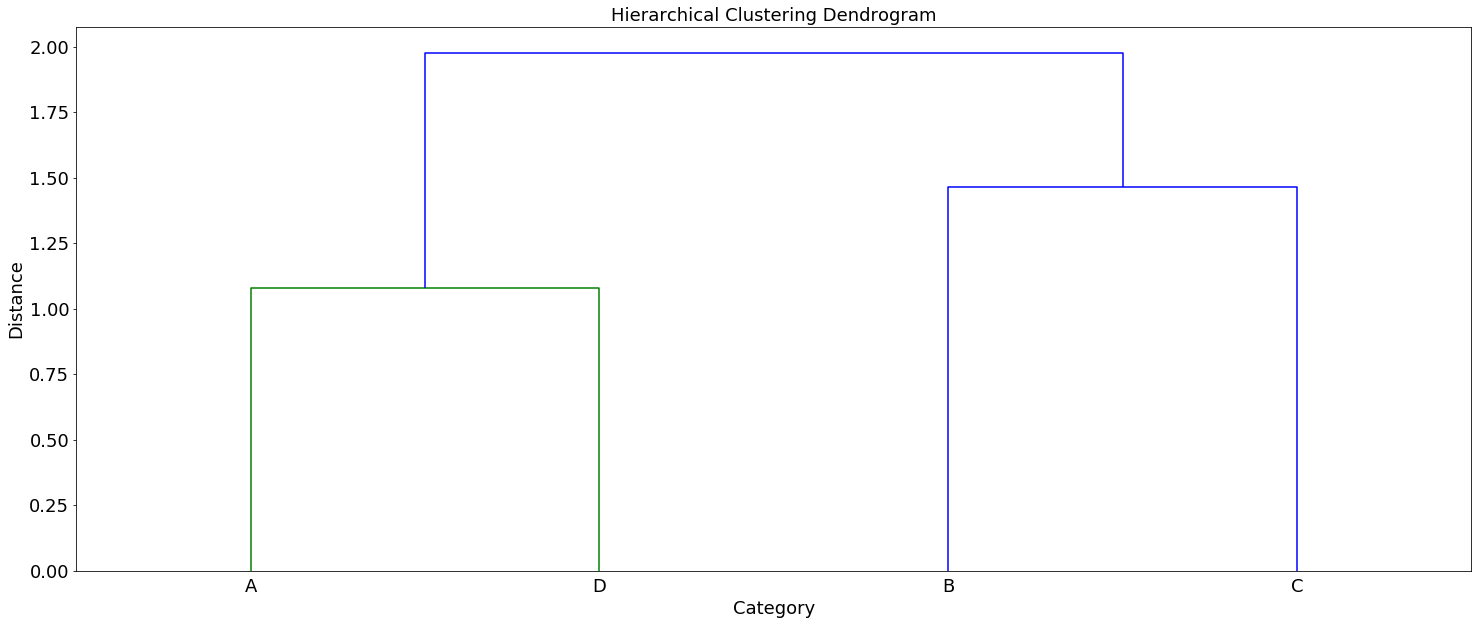

In [28]:
plt.figure(figsize=(25, 10))

dendogram = hac.dendrogram(clusters_hac, labels=sales_pivot_euclid.index)

plt.title('Hierarchical Clustering Dendrogram', fontsize=font_size)
plt.xlabel('Category', fontsize=font_size)
plt.ylabel('Distance', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size);